# 2.1 White Balancing (5 + 15 + 10 = 30 points)

Often the colors of a digital photo are not like you perceived them in reality and additional color processing is required. The key step in this process is usually called white balancing. One way to perform white balancing is to capture a photo of a target with known colors (Figure 1) and then do a least squares fit of measured color values to the desired ones.



<center>
  <img width="435" height="309" src="./images/checker.jpg">
<center>

<center> Figure 1: Image of a checkerboard with wrong colors.<center>

### Your tasks
Your job is to perform a least squares fit by filling in the missing lines in the sections below:<br>
> a) Fill the matrix __cam__ with the measured r, g, b values for each color patch of the checkerboard. Matrix __coords__ holds the upper left and bottom right _(y, x)_ coordinates of a region in the upper left patch from where colors can be extracted, while __delta__ is the offset in both x and y direction between two consecutive patches.<br>
> b) Compute the white balancing matrix __mat__ using the matrices __b__ and __cam__, applying the least squares fitting method.<br>
> c) Multiply each pixel of the original image with the calculated matrix __mat__ to perform white balancing.<br>

__Hint:__
Try to avoid using for-loops, the reshape function might be useful.<br>
__General Tips:__
We use the Peak Signal-to-Noise Ratio (PSNR) between the ground truth and the recovered image to measure the image fidelity, which in Python can be computed easily using _skimage_ with `peaksnr = peak_signal_noise_ratio(reference,target)`. We already imported the necessary function for you below.


In [1]:
# Imports
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

In [2]:
# Set paths to the location of the color checker and result folder.
checker_path = "./images"

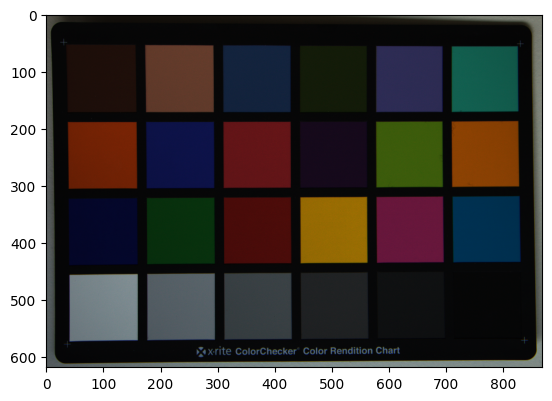

In [44]:
# Read color checker.
image = imageio.imread(os.path.join(checker_path, 'checker.tiff'))
image = image.astype(np.float32) / 255
#print(image)
plt.imshow(image)

In [4]:
# Given b, coordinate array to be used further on to fill in cam matrix.
b = np.array( [[115, 82,  68]
             ,[194, 150, 130]
             ,[98,  122, 157]
             ,[87,  108, 67]
             ,[133, 128, 177]
             ,[103, 189, 170]
             ,[214, 126, 44]
             ,[80,  91,  166]
             ,[193, 90,  99]
             ,[94,  60,  108]
             ,[157, 188, 64]
             ,[224, 163, 46]
             ,[56,  61,  150]
             ,[70,  148, 73]
             ,[175, 54,  60]
             ,[231, 199, 31]
             ,[187, 86,  149]
             ,[8,   133, 161]
             ,[243, 243, 242]
             ,[200, 200, 200]
             ,[160, 160, 160]
             ,[122, 122, 121]
             ,[85,  85,  85]
             ,[52,  52,  52]] ,dtype=np.float32)

# We precompute a couple of variables for you for your reference.
print("b shape", b.shape)
b_t = np.transpose(b)
print("b_t shape", b_t.shape)
# print(b)
b = (b / 255).astype(np.float32)
# print(b)
print("image.shape:", image.shape)
# Upper left and bottom right coordinates of the first patch.
coords = np.array([[80,  60],
                  [150, 130]])
print("coords shape:", coords.shape)
# Delta, i.e. spacing for the patches in x and y directions.
delta = 135.0

# Color for each patch. Default dtype is float32.
cam = np.zeros([24,3])
print("cam shape:", cam.shape)
cam_t = np.transpose(cam)
print("cam_t shape:", cam_t.shape)

b shape (24, 3)
b_t shape (3, 24)
image.shape: (618, 869, 3)
coords shape: (2, 2)
cam shape: (24, 3)
cam_t shape: (3, 24)


### a) Fill __cam__ matrix (5) 
Fill the matrix __cam__ with the measured r,g,b values for each color patch of the checkerboard here.
Matrix __coords__ holds the upper left and bottom right (y, x) coordinates of a region in the upper left patch from where colors can be extracted, while delta is the offset in both x and y direction (square patches) between two consecutive patches. Make the process robust against image noise and surface imperfections by averaging the extracted color over some part of a patch.

In [79]:
# a) TODO:
for i in range(24):
    # To get the correct y we use i // 6 * delta to round down depending on row
    # To get the correct x we use i % 6 * delta to hold the range of x in coords[1] + [0...135*6]
    top_left = coords[0] + np.array([i // 6 * delta, i % 6 * delta])
    bottom_right = coords[1] + np.array([i // 6 * delta, i % 6 * delta])
    
    # patch_colors gives a 70x70 pixel rgb array in the middle of the color patch
    patch_colors = image[int(top_left[0]):int(bottom_right[0]), int(top_left[1]):int(bottom_right[1])]

    # Calculating mean over axis 0 and 1 simultaneously
    patch_average_color = np.mean(patch_colors, axis=(0, 1))
    cam[i] = patch_average_color
print(cam)

[[1.15684003e-01 5.73877506e-02 3.87381688e-02]
 [3.80607545e-01 2.29054347e-01 1.66807145e-01]
 [7.53747299e-02 1.37993321e-01 2.38954052e-01]
 [7.56067485e-02 1.06790349e-01 3.53904851e-02]
 [1.77279249e-01 1.72067493e-01 3.27468008e-01]
 [7.07116127e-02 3.62329364e-01 3.01631093e-01]
 [4.40161526e-01 1.31759927e-01 1.83775052e-02]
 [5.06107397e-02 7.12133944e-02 2.78069377e-01]
 [3.85869354e-01 8.17807615e-02 9.18972418e-02]
 [8.50414187e-02 3.83412167e-02 1.06095232e-01]
 [2.35907555e-01 3.59510183e-01 4.54503484e-02]
 [5.38431466e-01 2.53205985e-01 1.15836766e-02]
 [1.71242207e-02 2.72121038e-02 1.63225025e-01]
 [3.11664473e-02 1.87253028e-01 5.21729328e-02]
 [2.88326293e-01 4.68068719e-02 3.83284129e-02]
 [5.91681182e-01 4.20502126e-01 1.19070057e-02]
 [4.03185725e-01 9.02258679e-02 2.33132675e-01]
 [1.12044818e-05 1.89332530e-01 3.14357996e-01]
 [4.56818193e-01 5.09484887e-01 5.31334996e-01]
 [3.28327358e-01 3.67192954e-01 3.92753005e-01]
 [2.17751786e-01 2.45840073e-01 2.595579

### b) Compute white balancing matrix (15)
Compute the white balancing matrix __mat__, using the matrices __b__ and __cam__, applying the least squares fitting method here.

__Hint:__ You can find a detailed derivation in the lecture slides. Be careful with the shape of the matrices, though and carefully check your transpositions. For accuracy and numerical stability we should avoid computing the inverse of a matrix explicitly. You can use `linalg.solve(a, b)` here instead (or any other method you know to solve a linear system of equations but please describe briefly in a comment what you do).

In [80]:
# b) TODO:
# We rearranged the equation from the slides so that C^T*C*WB^T = C^T*O and then used linalg.solve()
mat = np.linalg.solve(np.transpose(cam) @ cam, np.transpose(cam) @ b)
print(mat)

[[ 1.65840975  0.32816738  0.31448867]
 [ 0.17920618  1.62446113 -0.0613604 ]
 [ 0.55735482  0.46043539  2.07782527]]


### c) White-balance the image (10)
Multiply each pixel of the original image with the calculated matrix __mat__ to perform white balancing.

In [71]:
# c) TODO (name the result img_white_balanced):
image_white_balanced = np.zeros_like(image)
# We can calculate a new np matrix with np.dot where every rgb value is multiplied with the mat matrix
image_white_balanced = np.dot(image, mat)

/tmp/ipykernel_5044/3080849455.py:21: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(image, image_white_balanced)


PSNR between GT image and white balanced image: 11.437887981161822


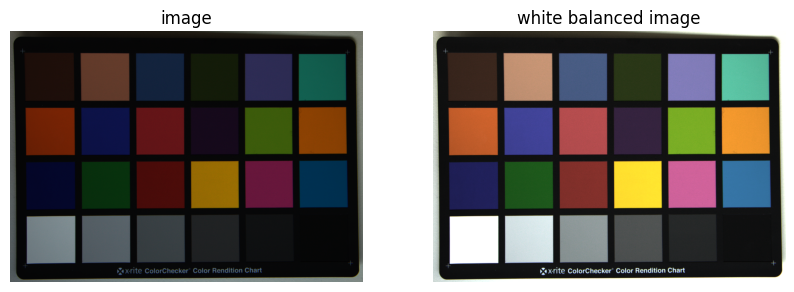

In [72]:
# Display image and white balanced image.

fig = plt.figure(figsize=(10, 7))   
# Setting values to rows and column variables.
rows = 1
columns = 2
# Adds a subplot at the 1st position.
fig.add_subplot(rows, columns, 1) 
plt.imshow(image)
plt.axis('off') 
plt.title("image") 

fig.add_subplot(rows, columns, 2) 
plt.imshow(np.clip(image_white_balanced, 0, 1))
plt.axis('off') 
plt.title("white balanced image")

# Evaluate using psnr
# TODO Compute the PSNR between the image and the image_white_balanced.
psnr = 0.0
psnr = peak_signal_noise_ratio(image, image_white_balanced)
print("PSNR between GT image and white balanced image:", psnr)

# Write the white balanced image:
imageio.imwrite(os.path.join(checker_path, 'my_white_balanced_checker.tiff') , np.array(image_white_balanced*255).astype(np.uint8))